<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-01-11 23:02:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  53.2MB/s    in 2.9s    

2025-01-11 23:02:12 (53.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [3]:
headers = df.columns.tolist()

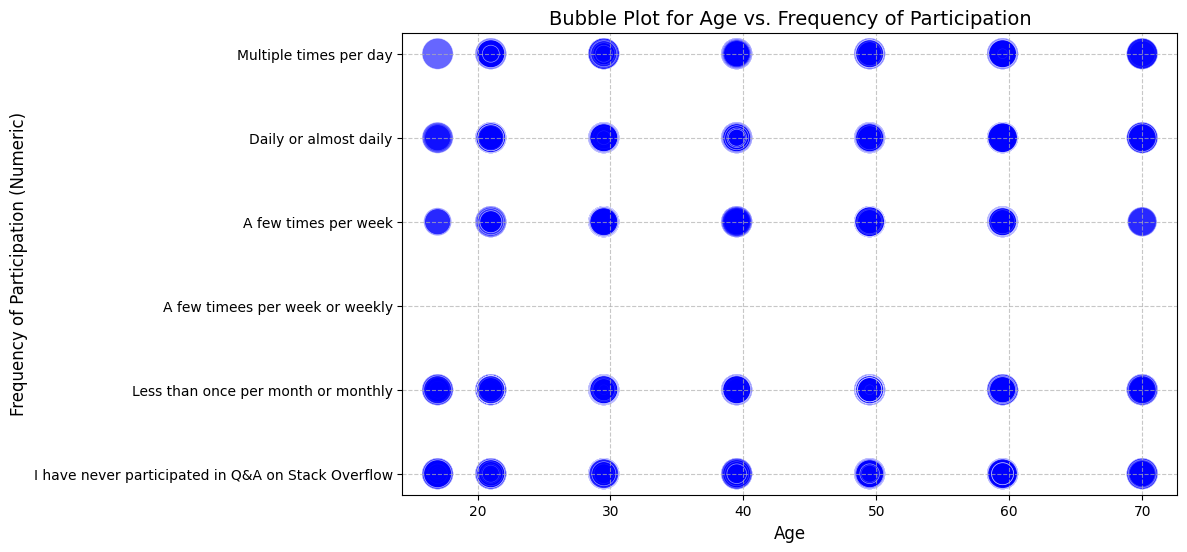

In [4]:
##Write your code here
# Map Age ranges to numeric midpoints
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['Age_numeric'] = df['Age'].map(age_mapping)

# Map SOPartFreq (Participation Frequency) to numeric values
sopartfreq_mapping = {
    'Less than once per month or monthly': 2,
    'I have never participated in Q&A on Stack Overflow': 1,
    'A few timees per week or weekly': 3,
    'A few times per week': 4,
    'Daily or almost daily': 5,
    'Multiple times per day': 6
}
df['SOPartFreq_numeric'] = df['SOPartFreq'].map(sopartfreq_mapping)

# Scale JobSat for bubble sizes
df['JobSat_scaled'] = df['JobSat'] * 50  # Scale to make bubbles visually distinct

# Drop rows with missing or invalid data
df = df.dropna(subset=['Age_numeric', 'SOPartFreq_numeric', 'JobSat_scaled'])

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['Age_numeric'], 
    y=df['SOPartFreq_numeric'], 
    s=df['JobSat_scaled'],  # Bubble size
    alpha=0.6,               # Transparency
    c='blue',                # Color of the bubbles
    edgecolors='w',          # White edges around the bubbles
    linewidth=0.5            # Edge line width
)

# Add labels and title
plt.title('Bubble Plot for Age vs. Frequency of Participation', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency of Participation (Numeric)', fontsize=12)

# Add custom ticks for y-axis (Participation Frequency)
plt.yticks(
    ticks=list(sopartfreq_mapping.values()), 
    labels=list(sopartfreq_mapping.keys())
)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [5]:
!pip install seaborn
import seaborn as sns

Expanded DataFrame for Scatter Plot:
         Age  JobSatPoints_6  ConvertedCompYearly
0      39.5            25.0                  NaN
1      39.5            30.0                  NaN
2      29.5            60.0                  NaN
3      29.5           100.0                  NaN
4      49.5            20.0                  NaN
...     ...             ...                  ...
19861  29.5            20.0                  NaN
19862  29.5            20.0                  NaN
19863  29.5             NaN                  NaN
19864  21.0            60.0                  NaN
19865  29.5             0.0                  NaN

[19866 rows x 3 columns]


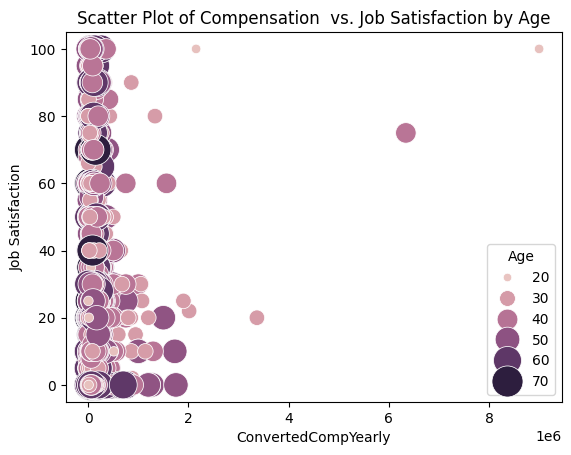

In [6]:
##Write your code here
# Mapping age ranges to numerical values (midpoints)
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category 
}

# Expand the dataset based on counts
expanded_ages = [] 
job_satisfaction = []
converted_comp = []
for _, row in df.iterrows():
    age_range = row['Age']
    if age_range in age_mapping and age_mapping[age_range] and df['JobSatPoints_6'] is not None:
        expanded_ages.append(age_mapping[age_range])
        job_satisfaction.append(row['JobSatPoints_6']) 
        converted_comp.append(row['ConvertedCompYearly'])

# Create a DataFrame from the expanded ages and work week hours
expanded_df = pd.DataFrame({'Age': expanded_ages, 'JobSatPoints_6': job_satisfaction, 'ConvertedCompYearly': converted_comp})
sns.scatterplot(
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    data=expanded_df, 
    size='Age',
    hue='Age',
    sizes=(10, 500)
)
print("Expanded DataFrame for Scatter Plot:\n", expanded_df)

# Create the scatter plot
# plt.figure(figsize=(10, 6))

plt.title('Scatter Plot of Compensation  vs. Job Satisfaction by Age')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Job Satisfaction')
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [7]:
df['DatabaseWantToWorkWith'].value_counts()

DatabaseWantToWorkWith
PostgreSQL                                                                                                                                                                 1370
Microsoft SQL Server                                                                                                                                                        540
PostgreSQL;SQLite                                                                                                                                                           487
SQLite                                                                                                                                                                      440
PostgreSQL;Redis                                                                                                                                                            370
                                                                                                 

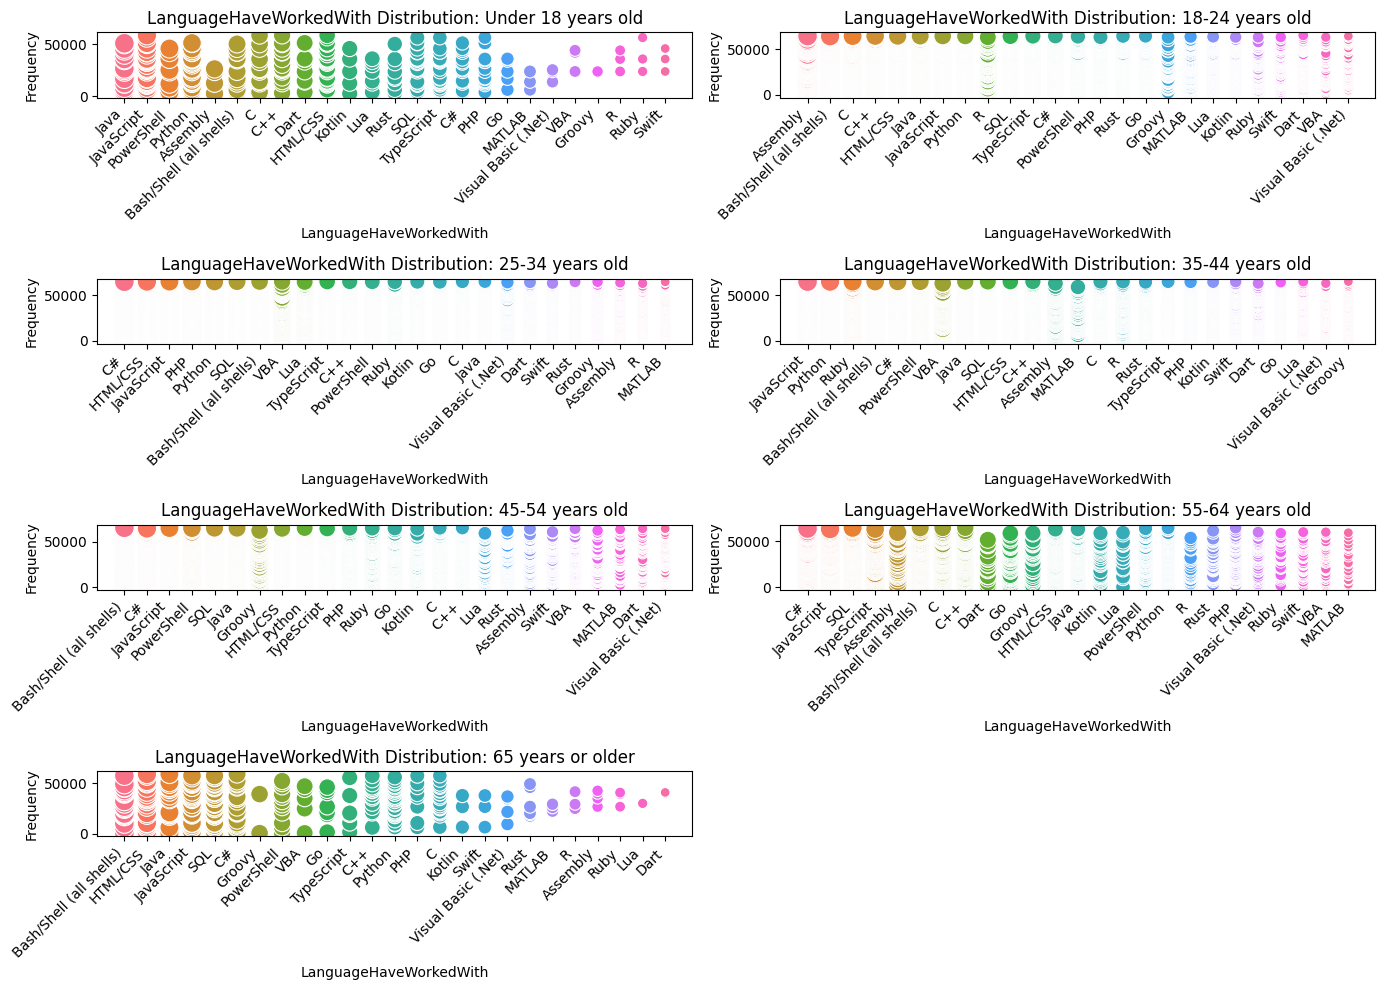

In [8]:
# Explode the 'LanguageHaveWorkedWith' column
df = df.assign(LanguageHaveWorkedWith=df['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Age mapping
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None 
} 

# Convert Age column to numerical values
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with None values in AgeNumeric
df = df.dropna(subset=['AgeNumeric'])

# Calculate frequencies
frequency = df['LanguageHaveWorkedWith'].value_counts().reset_index()
frequency.columns = ['LanguageHaveWorkedWith', 'Frequency']

# Select the top 25 languages
top_25_languages = frequency.head(25)['LanguageHaveWorkedWith']

# Filter the original dataframe to include only the top 25 languages
df_top_25 = df[df['LanguageHaveWorkedWith'].isin(top_25_languages)]

# Filter data for each age group and plot histograms
age_groups = { 
    'Under 18 years old': (0, 18), 
    '18-24 years old': (18, 25), 
    '25-34 years old': (25, 35), 
    '35-44 years old': (35, 45), 
    '45-54 years old': (45, 55), 
    '55-64 years old': (55, 65), 
    '65 years or older': (65, 100) 
}

plt.figure(figsize=(14, 10))

for i, (label, (min_age, max_age)) in enumerate(age_groups.items(), 1):
    age_group_df = df_top_25[(df_top_25['AgeNumeric'] >= min_age) & (df_top_25['AgeNumeric'] < max_age)]
    plt.subplot(4, 2, i)
    sns.scatterplot(x=age_group_df['LanguageHaveWorkedWith'].dropna(), y=age_group_df['LanguageHaveWorkedWith'].dropna().index, 
                    size=age_group_df['LanguageHaveWorkedWith'].dropna(), hue=age_group_df['LanguageHaveWorkedWith'].dropna(), 
                    sizes=(50, 200), legend=False, color='skyblue')
    plt.title(f'LanguageHaveWorkedWith Distribution: {label}')
    plt.xlabel('LanguageHaveWorkedWith')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


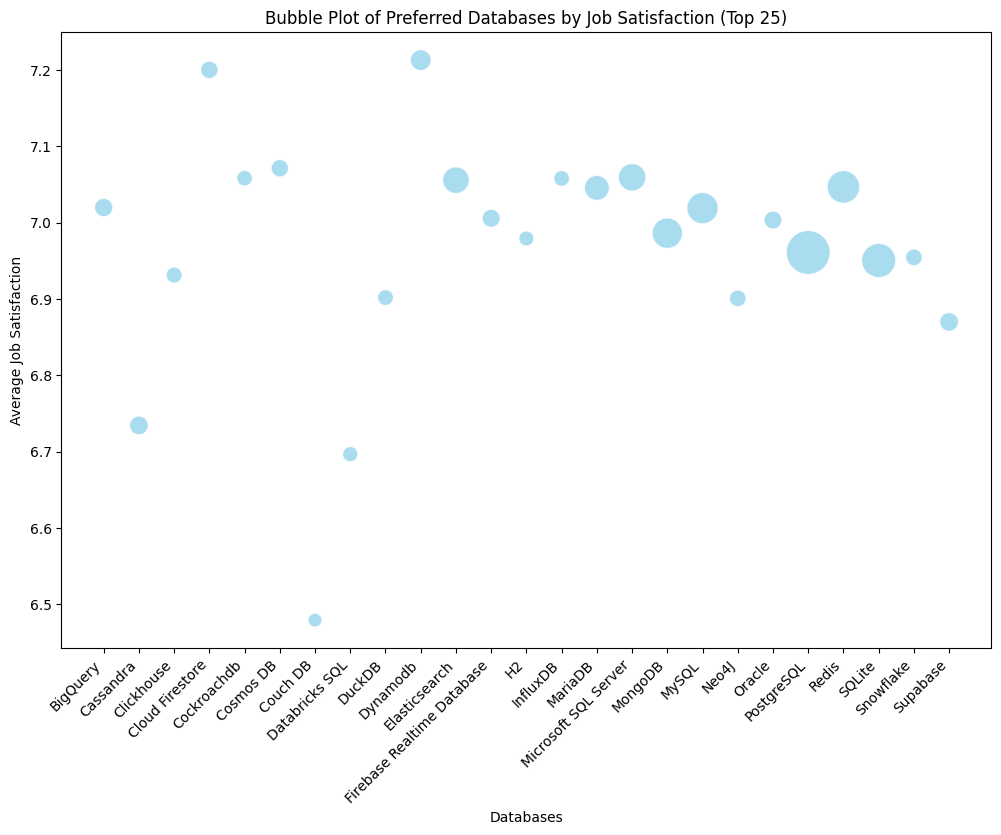

In [25]:
# Step 1: Expand 'DatabaseWantToWorkWith' into multiple rows
data_expanded = df.assign(DatabaseWantToWorkWith=df['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Calculate frequencies
frequency = data_expanded['DatabaseWantToWorkWith'].value_counts().reset_index()
frequency.columns = ['DatabaseWantToWorkWith', 'Frequency']

# Select the top 25 databases (if applicable)
top_25_databases = frequency.head(25)['DatabaseWantToWorkWith']

# Filter the original dataframe to include only the top 25 databases
df_top_25 = data_expanded[data_expanded['DatabaseWantToWorkWith'].isin(top_25_databases)]

# Step 2: Group by databases and calculate average job satisfaction
database_satisfaction = df_top_25.groupby('DatabaseWantToWorkWith').agg({'JobSat': 'mean', 'DatabaseWantToWorkWith': 'count'}).rename(columns={'DatabaseWantToWorkWith': 'Frequency'}).reset_index()

# Step 3: Create a bubble plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=database_satisfaction,
    x='DatabaseWantToWorkWith', 
    y='JobSat', 
    size='Frequency', 
    legend=False, 
    sizes=(100, 1000), 
    alpha=0.7, 
    color='skyblue'
)

# Step 4: Add labels and title
plt.title('Bubble Plot of Preferred Databases by Job Satisfaction (Top 25)')
plt.xlabel('Databases')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45, ha='right')  # Rotate database labels for better readability

# Show the plot
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


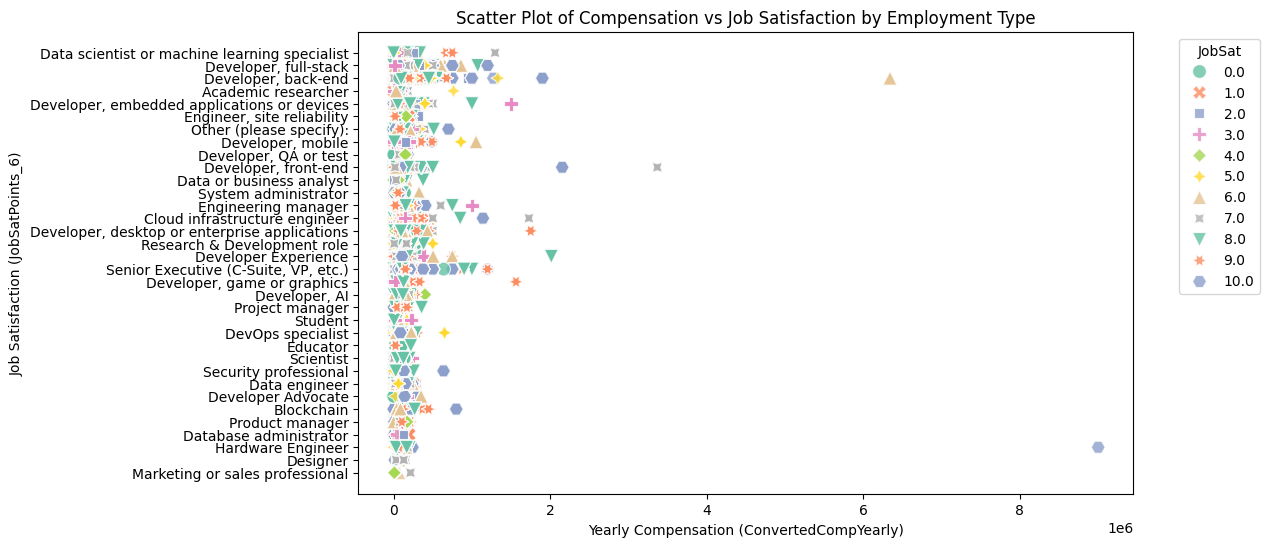

In [31]:
##Write your code here
data = df.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSat'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='ConvertedCompYearly', 
    y='DevType', 
    hue='JobSat',  # Differentiate by employment type
    style='JobSat',  # Use different markers for categories
    palette='Set2',  # Customize the color palette
    data=data,
    s=100,  # Set marker size
    alpha=0.8  # Transparency for overlapping points
)

# Add labels and title
plt.title('Scatter Plot of Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')

# Show plot
plt.legend(bbox_to_anchor=(1.05, 1),title='JobSat', loc='upper left')
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


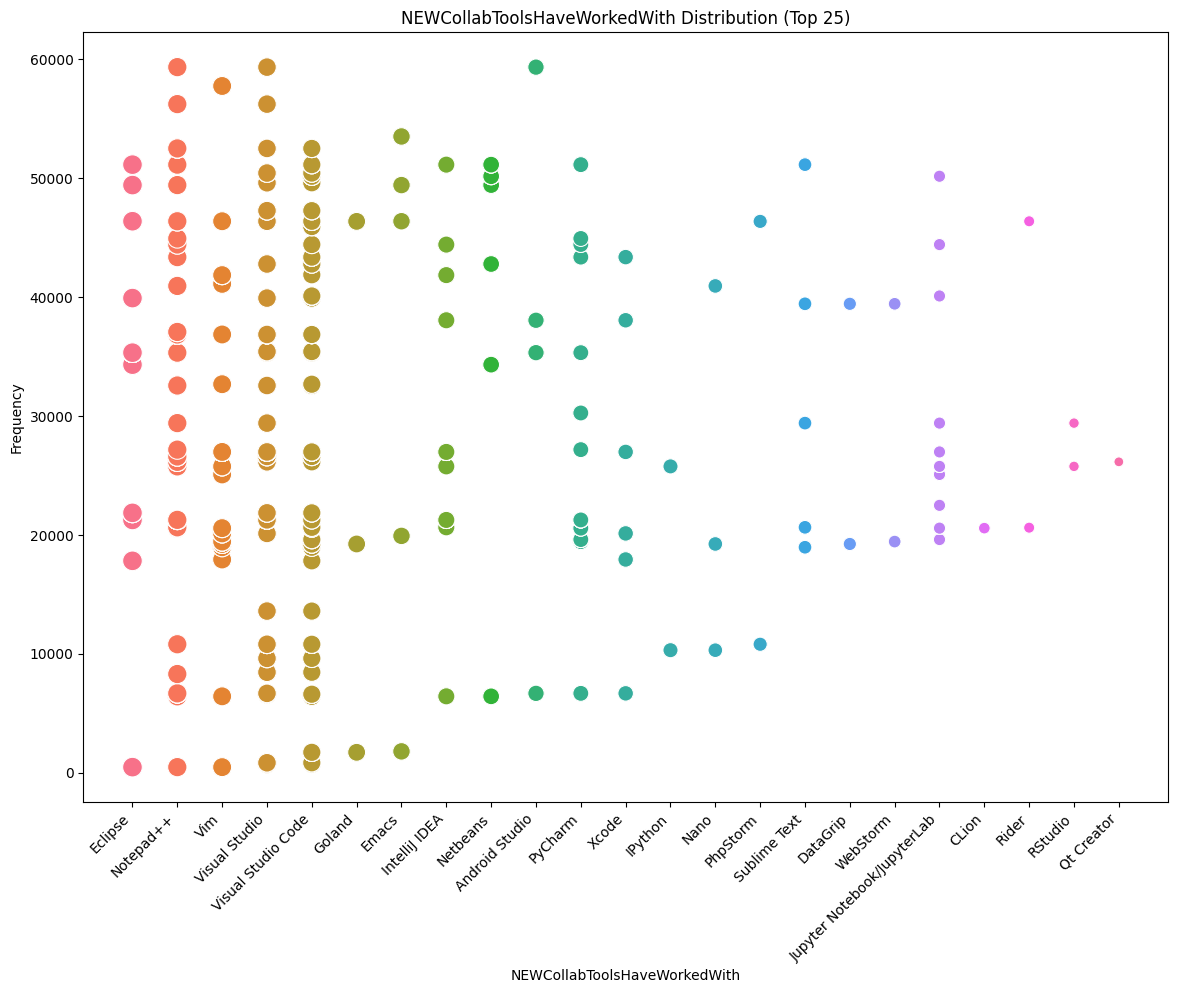

In [23]:
##Write your code here
data_expanded = df.assign(NEWCollabToolsHaveWorkedWith=df['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('NEWCollabToolsHaveWorkedWith')

# Calculate frequencies
frequency = data_expanded['NEWCollabToolsHaveWorkedWith'].value_counts().reset_index()
frequency.columns = ['NEWCollabToolsHaveWorkedWith', 'Frequency']

# Select the top 25 databases (if applicable)
top_25_databases = frequency.head(25)['NEWCollabToolsHaveWorkedWith']

# Filter the original dataframe to include only the top 25 databases
df_top_25 = data_expanded[data_expanded['NEWCollabToolsHaveWorkedWith'].isin(top_25_databases)]

# Age mapping
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None 
} 

# Convert Age column to numerical values
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with None values in AgeNumeric
df = df.dropna(subset=['AgeNumeric'])
# Filter data for each age group and plot histograms
age_groups = { 
    'Under 18 years old': (0, 18), 
    '18-24 years old': (18, 25), 
    '25-34 years old': (25, 35), 
    '35-44 years old': (35, 45), 
    '45-54 years old': (45, 55), 
    '55-64 years old': (55, 65), 
    '65 years or older': (65, 100) 
}

for i, (_, (min_age, max_age)) in enumerate(age_groups.items(), 1):
    age_group_df = df_top_25[(df_top_25['AgeNumeric'] >= min_age) & (df_top_25['AgeNumeric'] < max_age)]



plt.figure(figsize=(14, 10))
sns.scatterplot(x=age_group_df['NEWCollabToolsHaveWorkedWith'].dropna(), y=age_group_df['NEWCollabToolsHaveWorkedWith'].dropna().index, 
                    size=age_group_df['NEWCollabToolsHaveWorkedWith'].dropna(), hue=age_group_df['NEWCollabToolsHaveWorkedWith'].dropna(), 
                    sizes=(50, 200), legend=False, color='skyblue')
plt.title(f'NEWCollabToolsHaveWorkedWith Distribution (Top 25)')
plt.xlabel('NEWCollabToolsHaveWorkedWith')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



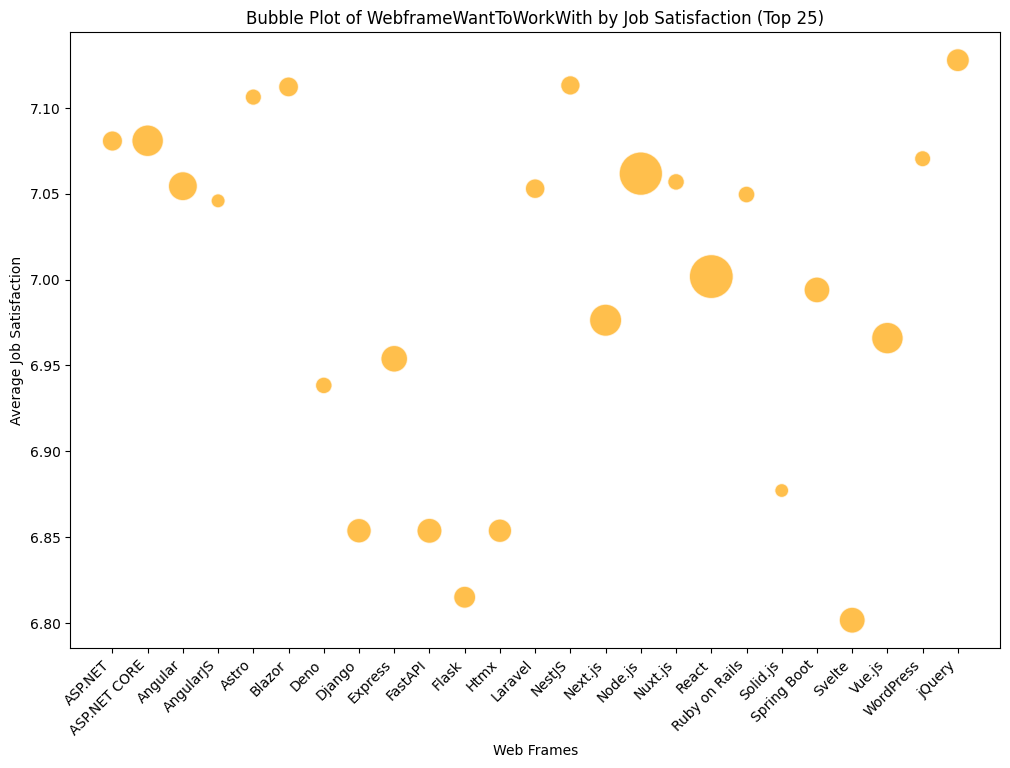

In [28]:
##Write your code here
data_expanded = df.assign(WebframeWantToWorkWith=df['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

# Calculate frequencies
frequency = data_expanded['WebframeWantToWorkWith'].value_counts().reset_index()
frequency.columns = ['WebframeWantToWorkWith', 'Frequency']

# Select the top 25 databases (if applicable)
top_25_databases = frequency.head(25)['WebframeWantToWorkWith']

# Filter the original dataframe to include only the top 25 databases
df_top_25 = data_expanded[data_expanded['WebframeWantToWorkWith'].isin(top_25_databases)]

# Step 2: Group by databases and calculate average job satisfaction
database_satisfaction = df_top_25.groupby('WebframeWantToWorkWith').agg({'JobSat': 'mean', 'WebframeWantToWorkWith': 'count'}).rename(columns={'WebframeWantToWorkWith': 'Frequency'}).reset_index()

# Step 3: Create a bubble plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=database_satisfaction,
    x='WebframeWantToWorkWith', 
    y='JobSat', 
    size='Frequency', 
    legend=False, 
    sizes=(100, 1000), 
    alpha=0.7, 
    color='orange'
)

# Step 4: Add labels and title
plt.title('Bubble Plot of WebframeWantToWorkWith by Job Satisfaction (Top 25)')
plt.xlabel('Web Frames')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45, ha='right')  # Rotate database labels for better readability

# Show the plot
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



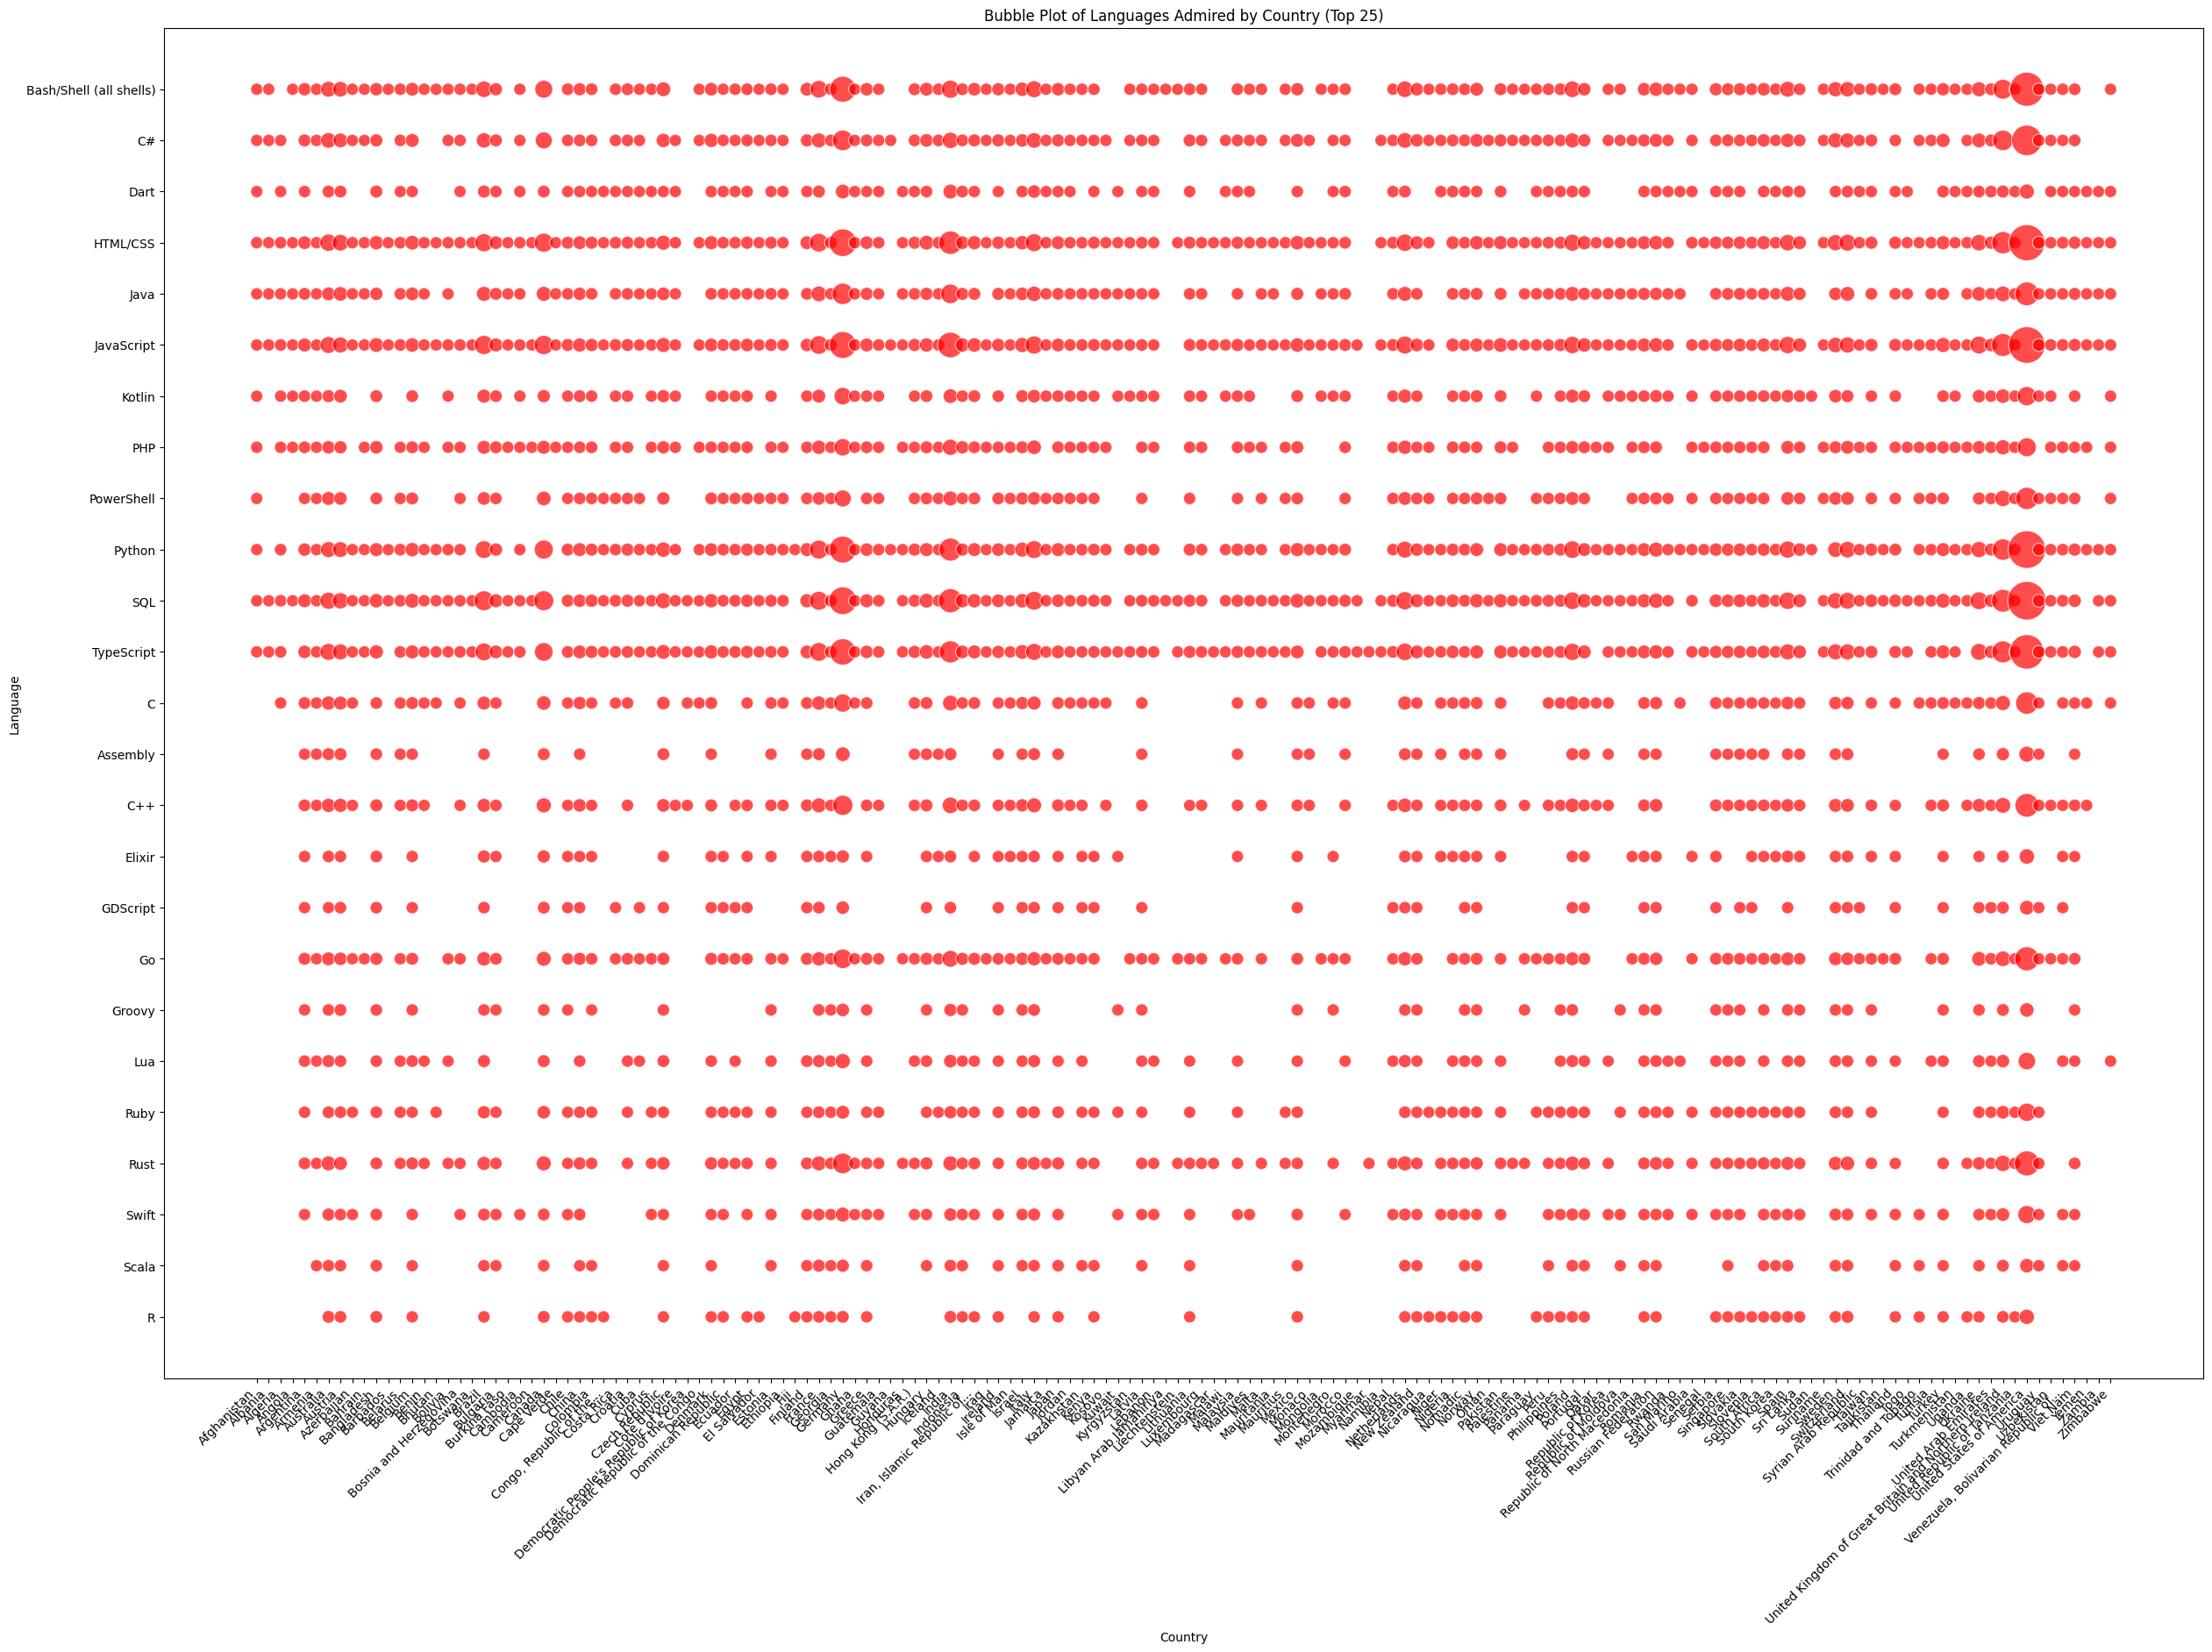

In [35]:
##Write your code here
# Step 1: Expand 'LanguageAdmired' into multiple rows
data_expanded = df.assign(LanguageAdmired=df['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Calculate frequencies
frequency = data_expanded['LanguageAdmired'].value_counts().reset_index()
frequency.columns = ['LanguageAdmired', 'Frequency']

# Select the top 25 languages (if applicable)
top_25_languages = frequency.head(25)['LanguageAdmired']

# Filter the original dataframe to include only the top 25 languages
df_top_25 = data_expanded[data_expanded['LanguageAdmired'].isin(top_25_languages)]

# Step 2: Group by 'Country' and 'LanguageAdmired' and calculate the frequency
database_satisfaction = df_top_25.groupby(['Country', 'LanguageAdmired']).agg({'LanguageAdmired': 'count'}).rename(columns={'LanguageAdmired': 'Frequency'}).reset_index()

plt.figure(figsize=(30,20))
bubble_plot = sns.scatterplot(
    data=database_satisfaction,
    x='Country', 
    y='LanguageAdmired', 
    size='Frequency', 
    legend=False, 
    sizes=(100, 1000), 
    alpha=0.7, 
    color='red'
)

# Step 4: Add labels and title
plt.title('Bubble Plot of Languages Admired by Country (Top 25)')
plt.xlabel('Country')
plt.ylabel('Language')
plt.xticks(rotation=45, ha='right')  # Rotate database labels for better readability

# Show the plot
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
